In [ ]:
# 题目：信用卡欺诈检测
# 背景
# 信用卡欺诈是一个常见的问题，银行和金融机构需要有效的手段来检测和预防欺诈交易。本任务的目标是使用机器学习方法对信用卡交易数据进行分类，区分正常交易和欺诈交易。

# 数据集
# 训练数据集：train.csv，包含已标记的交易记录。
# 测试数据集：test.csv，包含未标记的交易记录。
# 数据字段：
# Time：交易发生的时间（秒）。
# V1 至 V28：经过PCA转换的特征。
# Amount：交易金额。
# Class：目标变量，0表示正常交易，1表示欺诈交易（仅在训练集中有此字段）。
# 任务
# 数据预处理：
# 加载数据集。
# 处理缺失值（如果有）。
# 标准化或归一化数值特征。
# 将类别特征进行编码（如果有）。
# 特征工程：
# 选择合适的特征。
# 创建新的特征（可选）。
# 模型训练：
# 选择合适的机器学习算法（如逻辑回归、随机森林、支持向量机等）。
# 划分训练集和验证集。
# 训练模型。
# 调整超参数以优化模型性能。
# 模型评估：
# 使用准确率、精确率、召回率和F1分数等指标评估模型性能。
# 绘制ROC曲线并计算AUC值。
# 测试数据预测：
# 对测试数据集进行预测。
# 将预测结果保存到CSV文件中，格式为：test_predictions.csv，包含两列：TransactionID 和 PredictedClass。
# 提交要求
# 提交的文件包括：
# test_predictions.csv：包含测试数据集的预测结果。
# code.ipynb：包含完整代码和注释的Jupyter Notebook文件。
# 评分标准
# 准确性：预测结果的准确性（占40%）。
# 代码质量：代码的可读性和结构（占30%）。
# 模型性能：模型的性能指标（占30%）。

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [3]:
# 1. 数据预处理
train_data = pd.read_csv('./qiza_train.csv')
test_data = pd.read_csv('./qiza_test.csv')

In [4]:
# 分离特征和目标变量
X_train = train_data.drop(['Class', 'Time'], axis=1)
y_train = train_data['Class']
X_test = test_data.drop(['Time'], axis=1)

In [5]:
# 标准化特征
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# 2. 特征工程（可选）
# 例如，可以创建新的特征或选择特定的特征

# 3. 模型训练
model = LogisticRegression(max_iter=1000)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)
model.fit(X_train_split, y_train_split)

LogisticRegression(max_iter=1000)

In [7]:
# 4. 模型评估
y_val_pred = model.predict(X_val_split)
y_val_pred_proba = model.predict_proba(X_val_split)[:, 1]

In [14]:
# 计算评估指标，处理零除问题
accuracy = accuracy_score(y_val_split, y_val_pred)
precision = precision_score(y_val_split, y_val_pred, zero_division=0)
recall = recall_score(y_val_split, y_val_pred, zero_division=0)
f1 = f1_score(y_val_split, y_val_pred, zero_division=0)
auc = roc_auc_score(y_val_split, y_val_pred_proba)

In [9]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'AUC: {auc}')

Accuracy: 0.9925
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC: 0.45329974811083124


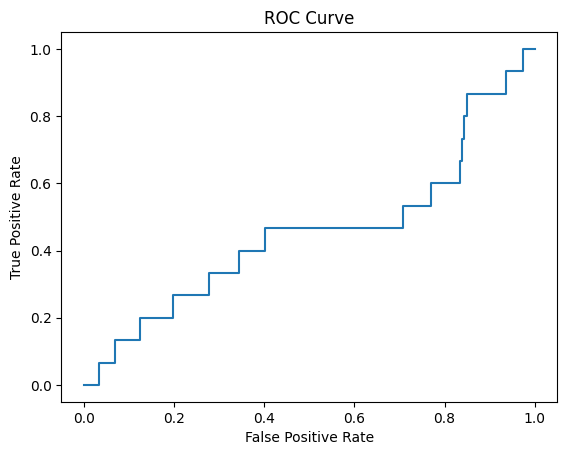

In [15]:
# 绘制ROC曲线
fpr, tpr, _ = roc_curve(y_val_split, y_val_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [13]:
# 5. 测试数据预测
test_predictions = model.predict(X_test_scaled)
test_data['Class'] = test_predictions
test_data[['Time', 'Class']].to_csv('test_qiza_predictions.csv', index=False)